In [4]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

import tensorflow as tf 
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import h5py
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
from numpy import ma
from matplotlib import ticker, cm
import matplotlib.cm as cm
from pylab import rcParams
import scipy.io as sio
from scipy import stats
import math
import pandas as pd 
import shutil 
from IPython.core import display as ICD
import tensorflow_probability as tfp
tfd = tfp.distributions
print ( "imported libraries sucessfully")



Instructions for updating:
non-resource variables are not supported in the long term


ImportError: This version of TensorFlow Probability requires TensorFlow version >= 2.1; Detected an installation of version 2.0.0. Please upgrade TensorFlow to proceed.

In [5]:
data_set=sio.loadmat('Anomaly_detection_1.mat')

In [6]:
X=data_set['X']
Xval=data_set['Xval']
yval=data_set['yval']

In [7]:
Data_set={'throughput':X[:,0],'Latency':X[:,1]}

In [8]:
Data_set=pd.DataFrame(Data_set)

In [9]:
Data_set.head()

,throughput,Latency
0,13.046815,14.741152
1,13.408520,13.763270
2,14.195915,15.853181
3,14.914701,16.174260
4,13.576700,14.042849


Text(0, 0.5, 'Throughput')

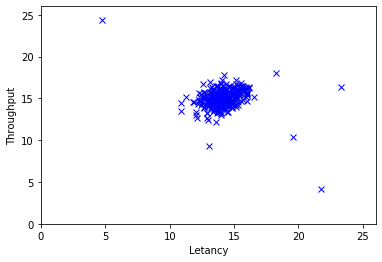

In [10]:
plt.plot(X[:,0],X[:,1],'bx')
plt.axis([0,26,0,26])
plt.xlabel('Letancy')
plt.ylabel('Throughput')

In [11]:
details_information=Data_set.describe()

In [12]:
print ( details_information)

       throughput     Latency
count  307.000000  307.000000
mean    14.112226   14.997711
std      1.355957    1.309707
min      4.752613    4.126232
25%     13.403351   14.361997
50%     14.059507   15.023113
75%     14.675503   15.654394
max     23.339868   24.350407


In [17]:
x=tf.constant(Data_set)
mean,Varaince=tf.nn.moments(x,[0])

In [18]:
with tf.Session() as sess:
    m,v = sess.run([mean,Varaince])
    print ( m,v)

[14.11222578 14.99771051] [1.83263141 1.70974533]


Visualizing Gaussian in terms of sigma fit 



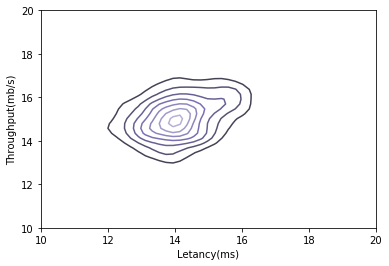

In [19]:
print ( "Visualizing Gaussian in terms of sigma fit \n")
plt.axis([10,20,10,20])
plt.xlabel('Letancy(ms)')
plt.ylabel('Throughput(mb/s)')
sns.kdeplot(Data_set,v,n_levels=7,cmap="Purples_d")

In [20]:
def selectThresholdlimits(yval, pval):
    """
        SELECTTHRESHOLD Find the best threshold (epsilon) to use for selecting
        outliers
       [bestEpsilon bestF1] = SELECTTHRESHOLD(yval, pval) finds the best
       threshold to use for selecting outliers based on the results from a
       validation set (pval) and the ground truth (yval).
       
       
    """
    sess = tf.InteractiveSession()
    m=np.size(yval)
#     print(np.max(pval),np.min(pval))
    stepsize = (np.max(pval.eval()) - np.min(pval.eval())) / 100
    for_loopiteration=np.arange( np.min(pval.eval()),np.max(pval.eval()),stepsize)
    length =len(for_loopiteration)
    length_yval=len(yval)
    cv_prediction=np.zeros((m,1))
    bestEpsilon = 0
    bestF1 = 0
    F1=0
    for j in range(0, length):
        print ("Step_Number",j)
    
        for i in range ( 1,m):
            tp=0
            fp=0
            fn=0 

#             if (pval.eval()[i]<for_loopiteration[j]):
#             np.all((pval.eval()[i]<for_loopiteration[j]))
            for  DD in pval.eval()[i] < for_loopiteration[j] :
    #Anamoly    
                if DD:
                    cv_prediction[i]=1
   
                else:
    #Normal 
                    cv_prediction[i]=0
        

            for i in range ( 0,m):
                        if (cv_prediction[i]==1 and yval[i]==1):
                                    tp=tp+1
                        if (cv_prediction[i]==1 and yval[i]==0):
                                    fp=fp+1
                                
                        if (cv_prediction[i]==0 and yval[i]==1):
                                    fn=fn+1
            

            if (tp ==0 and  fp==0 ):
                    precesion=0
                    
            if (tp ==0 or fn==0 ):
                    Recall=0
                    
            else :       
                    precesion=tp/(tp+fp)
                    Recall=tp/(tp+fn)
                    F1=(2*precesion*Recall)/(precesion+Recall)

            if (F1 > bestF1):
                   bestF1 = F1
                   bestEpsilon = for_loopiteration[j]

    
    return bestEpsilon,bestF1

In [21]:
tfd=tfp.distributions
dist=tfd.Normal(mean,Varaince)
p_val=dist.prob(Xval)


NameError: name 'tfp' is not defined

In [92]:
tfd=tfp.distributions
dist=tfd.Normal(mean,Varaince)
p=dist.prob(X)


In [46]:
epsilon,F1=selectThresholdlimits(yval,p_val)

Step_Number 0
Step_Number 1
Step_Number 2
Step_Number 3
Step_Number 4
Step_Number 5
Step_Number 6
Step_Number 7
Step_Number 8
Step_Number 9
Step_Number 10
Step_Number 11
Step_Number 12
Step_Number 13
Step_Number 14
Step_Number 15
Step_Number 16
Step_Number 17
Step_Number 18
Step_Number 19
Step_Number 20
Step_Number 21
Step_Number 22
Step_Number 23
Step_Number 24
Step_Number 25
Step_Number 26
Step_Number 27
Step_Number 28
Step_Number 29
Step_Number 30
Step_Number 31
Step_Number 32
Step_Number 33
Step_Number 34
Step_Number 35
Step_Number 36
Step_Number 37
Step_Number 38
Step_Number 39
Step_Number 40
Step_Number 41
Step_Number 42
Step_Number 43
Step_Number 44
Step_Number 45
Step_Number 46
Step_Number 47
Step_Number 48
Step_Number 49
Step_Number 50
Step_Number 51
Step_Number 52
Step_Number 53
Step_Number 54
Step_Number 55
Step_Number 56
Step_Number 57
Step_Number 58
Step_Number 59
Step_Number 60
Step_Number 61
Step_Number 62
Step_Number 63
Step_Number 64
Step_Number 65
Step_Number 66
Step_

In [93]:
outliers=np.where(p.eval() <epsilon)

In [94]:
print(outliers)

(array([147, 170, 300, 301, 301, 303, 303, 304, 305, 305, 306, 306],
      dtype=int64), array([0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1], dtype=int64))


In [95]:
Final_outliers=outliers[0]
print(Final_outliers)

[147 170 300 301 301 303 303 304 305 305 306 306]


<function matplotlib.pyplot.show>

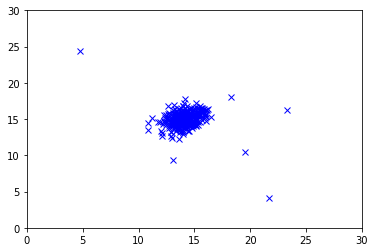

In [96]:
plt.axis([0,30,0,30])
plt.plot(X[:,0],X[:,1],'bx')
plt.figure(1)
plt.show

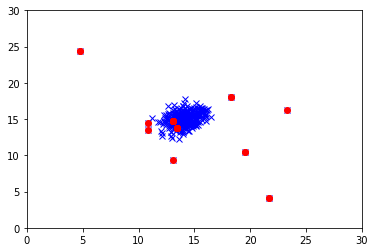

In [97]:
plt.axis([0,30,0,30])
plt.figure(1)
plt.plot(X[:,0],X[:,1],'bx',X[outliers,0],X[outliers,1],'ro')

imported libraries sucessfuly


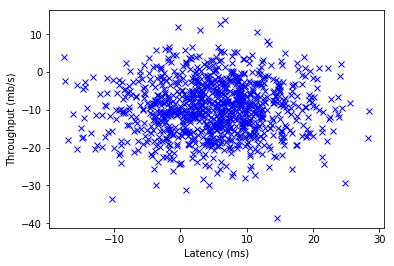

In [98]:
data_set2=sio.loadmat('Anomaly_detection_2.mat')
print ( "imported libraries sucessfuly")

X_2=data_set2['X']
Xval_2=data_set2['Xval']
yval_2=data_set2['yval']
plt.plot(X_2[:, 0], X_2[:, 1],'bx')
# plt.axis([0,30,0,30])
plt.xlabel('Latency (ms)')
plt.ylabel('Throughput (mb/s)')

plt.show()

In [99]:
Data_set2={'throughput':X_2[:,0],'Latency':X_2[:,1]}
Data_set2=pd.DataFrame(Data_set2)
Data_set2.head()

,throughput,Latency
0,6.653114,13.689702
1,-5.630542,-18.937667
2,9.721525,-9.982489
3,-4.635766,-10.716040
4,-12.841044,-20.388313


In [100]:
x2=tf.constant(Data_set2)
mean2,Varaince2=tf.nn.moments(x2,[0])


Visualizing Gaussian in terms of sigma fit 



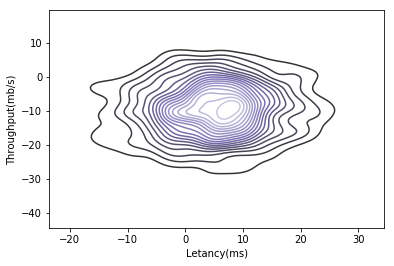

In [101]:
print ( "Visualizing Gaussian in terms of sigma fit \n")
# plt.axis([10,20,10,20])
plt.xlabel('Letancy(ms)')
plt.ylabel('Throughput(mb/s)')
sns.kdeplot(Data_set2,Varaince2.eval(),n_levels=25,cmap="Purples_d")


In [120]:
#X_2 Xval_2  yval_2
x2=tf.constant(Data_set2)
mean2,Varaince2=tf.nn.moments(x2,[0])
tfd2=tfp.distributions
dist2=tfd2.Normal(mean2,Varaince2)


X_val_2=tf.constant(Xval_2)
mean2_val,Varaince2_val=tf.nn.moments(X_val_2,[0])
tfd2_val=tfp.distributions
dist2_val=tfd2.Normal(mean2_val,Varaince2_val)


In [121]:
p_2=dist2.prob(x2)

In [123]:
p_val_2=dist2_val.prob(X_val_2)

In [125]:
# # p_val_2=dist.prob(Xval_2)
epsilon2,F1_2=selectThresholdlimits(yval_2,p_val_2)

Step_Number 0
Step_Number 1
Step_Number 2
Step_Number 3
Step_Number 4
Step_Number 5
Step_Number 6
Step_Number 7
Step_Number 8
Step_Number 9
Step_Number 10
Step_Number 11
Step_Number 12
Step_Number 13
Step_Number 14
Step_Number 15
Step_Number 16
Step_Number 17
Step_Number 18
Step_Number 19
Step_Number 20
Step_Number 21
Step_Number 22
Step_Number 23
Step_Number 24
Step_Number 25
Step_Number 26
Step_Number 27
Step_Number 28
Step_Number 29
Step_Number 30
Step_Number 31
Step_Number 32
Step_Number 33
Step_Number 34
Step_Number 35
Step_Number 36
Step_Number 37
Step_Number 38
Step_Number 39
Step_Number 40
Step_Number 41
Step_Number 42
Step_Number 43
Step_Number 44
Step_Number 45
Step_Number 46
Step_Number 47
Step_Number 48
Step_Number 49
Step_Number 50
Step_Number 51
Step_Number 52
Step_Number 53
Step_Number 54
Step_Number 55
Step_Number 56
Step_Number 57
Step_Number 58
Step_Number 59
Step_Number 60
Step_Number 61
Step_Number 62
Step_Number 63
Step_Number 64
Step_Number 65
Step_Number 66
Step_

In [142]:
outliers=np.where(p_val_2.eval() <epsilon2)


In [138]:
Final_outliers=outliers[0]
print(Final_outliers)

[ 0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  2  2  2  2  2  2
  2  2  2  3  3  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4  4  5  5
  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7
  7  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9  9 10 10 10 10 10
 10 10 10 10 11 11 11 11 11 11 11 11 11 12 12 12 12 12 12 12 12 12 13 13
 13 13 13 13 13 13 13 14 14 14 14 14 14 14 14 14 14 15 15 15 15 15 15 15
 15 15 15 16 16 16 16 16 16 16 16 16 17 17 17 17 17 17 17 17 17 18 18 18
 18 18 18 18 18 18 19 19 19 19 19 19 19 19 19 19 20 20 20 20 20 20 20 20
 20 21 21 21 21 21 21 21 21 21 22 22 22 22 22 22 22 22 22 22 23 23 23 23
 23 23 23 23 23 24 24 24 24 24 24 24 24 24 25 25 25 25 25 25 25 25 25 26
 26 26 26 26 26 26 26 26 27 27 27 27 27 27 27 27 27 28 28 28 28 28 28 28
 28 28 29 29 29 29 29 29 29 29 29 29 30 30 30 30 30 30 30 30 30 30 31 31
 31 31 31 31 31 31 31 32 32 32 32 32 32 32 32 32 33 33 33 33 33 33 33 33
 33 34 34 34 34 34 34 34 34 34 35 35 35 35 35 35 35

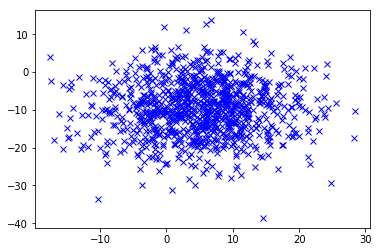

In [139]:
# plt.axis([0,30,0,30])
plt.plot(X_2[:, 0], X_2[:, 1],'bx')
plt.figure(1)
plt.show()

Visualizing Gaussian in terms of sigma fit.




<function matplotlib.pyplot.show>

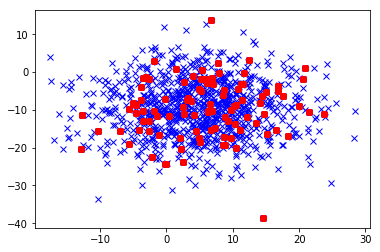

In [140]:
# plt.figure(2)
# plt.axis([10,20,10,20])
# plt.xlabel('Latency (ms)');
# plt.ylabel('Throughput (mb/s)');

# sns.kdeplot(Data_set, mean, n_levels=7, cmap="Purples_d")
# plt.show()


print('Visualizing Gaussian in terms of sigma fit.\n\n');


plt.figure(1)
plt.plot(X_2[:, 0], X_2[:, 1],'bx',X_2[outliers, 0], X_2[outliers, 1],'ro')
plt.show
